In [1]:

import pandas as pd
from generator import Constraint
from difficulty import DifficultyEstimator, DifficultyLevel
from utils import *
from preprocessing import Preprocessor

# Ensure we're running in the right directory
chdir_this_file()


FIELD_SIZE = 3
MIN_CELL_SIZE = 1
MAX_CELL_SIZE = None

language = "de"

countries = pd.read_json(f"../../public/data/countries/countries-{language.lower()}.json", encoding="utf8")
preprocessor = Preprocessor(countries=countries,
                            language=language,
                            field_size=FIELD_SIZE,
                            min_cell_size=MIN_CELL_SIZE,
                            max_cell_size=MAX_CELL_SIZE)

constraints = [
    # Some categories are pretty boring to appear multiple times
    Constraint.category_at_most("capital_ending_letter", 1),
    Constraint.category_at_most("capital_starting_letter", 1),
    Constraint.category_at_most("ending_letter", 1),
    # Limit the number of cells a country can appear in
    *Constraint.solutions_at_most(countries.iso.tolist(), 3)
]
category_probs = {
    'continent': 4,
    'starting_letter': 3,
    'ending_letter': 1.5,
    'capital_starting_letter': 2,
    'capital_ending_letter': .5,
    'flag_colors': 3,
    'landlocked': 2,
    'island': 2,
    'top_20_population': 2.5,
    'bottom_20_population': 2,
    'top_20_area': 2.5,
    'bottom_20_area': 2,
    'elevation_sup5k': 2.5,
    'elevation_sub1k': 2,
}

generator = preprocessor.get_generator(constraints, category_probs,
                                       seed=None, selection_mode="shuffle_setkeys", uniform=False, shuffle=True)
games = list(generator.sample_games(n=5000))

# Difficulty computation
estimator = DifficultyEstimator(preprocessor)
difficulty_info = estimator.compute_game_difficulties(games)

# Save games to JSON file
preprocessor.save_games(games, name="elev-pop")


Removed 19 category sets
contents: 197
retain: 197
No countries to remove
Generated 89 sets and 3338 cells


  0%|                                                                                                               | 1/5000 [00:00<09:39,  8.62it/s]

Retained 1856 cells (of size 1-None)
Generate 5000 games...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [16:05<00:00,  5.18it/s]


Compute difficulty of 197 countries...
Compute difficulty of 89 category-value pairs...
Compute difficulty of 1856 cells...
Compute difficulty of 5000 games...
5000 games saved to ../../public/data/games/de/games-20231025-182744-elev-pop-de.json


In [2]:
language1 = "en"

countries1 = pd.read_json(f"../../public/data/countries/countries-{language1.lower()}.json", encoding="utf8")
preprocessor1 = Preprocessor(countries=countries1,
                             language=language1,
                             field_size=FIELD_SIZE,
                             min_cell_size=MIN_CELL_SIZE,
                             max_cell_size=MAX_CELL_SIZE)

generator1 = preprocessor1.get_generator(constraints, category_probs,
                                         seed=None, selection_mode="shuffle_setkeys", uniform=False, shuffle=True)
games1 = list(generator1.sample_games(n=5000))

# Difficulty computation
estimator1 = DifficultyEstimator(preprocessor1)
difficulty_info1 = estimator1.compute_game_difficulties(games1)

# Save games to JSON file
preprocessor1.save_games(games1, name="elev-pop")


Removed 16 category sets
contents: 197
retain: 197
No countries to remove
Generated 91 sets and 3492 cells


  0%|                                                                                                               | 1/5000 [00:00<09:39,  8.63it/s]

Retained 1881 cells (of size 1-None)
Generate 5000 games...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [16:26<00:00,  5.07it/s]


Compute difficulty of 197 countries...
Compute difficulty of 91 category-value pairs...
Compute difficulty of 1881 cells...
Compute difficulty of 5000 games...
5000 games saved to ../../public/data/games/en/games-20231025-184519-elev-pop-en.json


In [2]:
games[0].data

{'max_cell_difficulty': 5.849056651947264,
 'avg_cell_difficulty': 4.513776174040688,
 'difficulty_level': 'hard'}

## From `game_stats.ipynb`

In [50]:
import matplotlib.pyplot as plt
import numpy as np

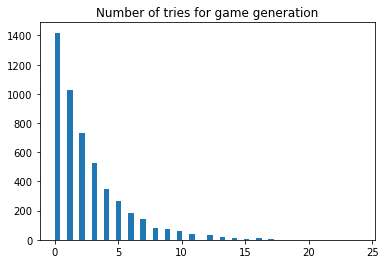

In [51]:
plt.hist([game.sample_tries for game in games], bins=50, rwidth=.9)
plt.title("Number of tries for game generation")
plt.show()

In [52]:
# sample_tries = pd.Series([game.sample_tries for game in games]).value_counts()
# sample_tries = np.array([sample_tries.get(i, 0) for i in range(100)])
# p = (1 - sample_tries / np.roll(np.where(sample_tries != 0, sample_tries, np.nan), 1))[1:]
# plt.scatter(x=p, y=np.zeros_like(p))
# plt.show()

In [53]:
difficulty_info["max_occurences"] = difficulty_info["game"].apply(lambda game: pd.Series(sum(sum(game.solutions, []), [])).value_counts().max())
difficulty_info["max_occurences"].describe()

count    5000.000000
mean        2.353600
std         0.481054
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: max_occurences, dtype: float64

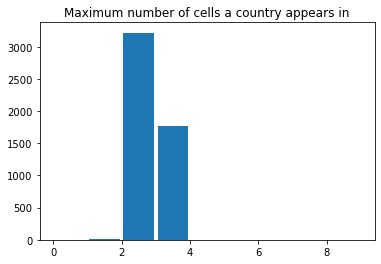

In [54]:
plt.hist(difficulty_info["max_occurences"], bins=range(10), rwidth=.9)
plt.title("Maximum number of cells a country appears in")
plt.show()

In [55]:
difficulty_info

,game,rows,cols,cell_indices,cell_difficulties,max_cell_difficulty,avg_cell_difficulty,num_unique,difficulty,difficulty_order,level,max_occurences
0,<game.Game object at 0x000002D1556F1550>,"[(elevation_sup5k, True), (island, True), (cap...","[(flag_colors, Blue), (flag_colors, Green), (t...","[1794, 1806, 1861, 1789, 1801, 1854, 1672, 167...","[2.2073361794890305, 2.922457087085059, 2.2363...",4.768539,3.418726,3,2.611091,16,medium,3
1,<game.Game object at 0x000002D1556F1130>,"[(landlocked, True), (capital_starting_letter,...","[(top_20_area, True), (top_20_population, True...","[1848, 1846, 1850, 1568, 1567, 1569, 69, 67, 71]","[4.278088141619825, 4.167739622994053, 4.57143...",4.571438,3.375594,4,2.859547,14,medium,3
2,<game.Game object at 0x000002D153337850>,"[(ending_letter, I), (top_20_population, True)...","[(starting_letter, M), (island, True), (contin...","[664, 1043, 19, 696, 1852, 67, 699, 1855, 70]","[6.023473375707735, 6.07246946582722, 5.571646...",6.607444,4.942607,2,4.607050,81,hard,2
3,<game.Game object at 0x000002D1533377F0>,"[(flag_colors, Black), (elevation_sup5k, True)...","[(continent, SA), (starting_letter, M), (landl...","[339, 687, 1775, 348, 700, 1850, 346, 696, 1846]","[5.136938296238529, 5.149311868864083, 4.75596...",5.149312,4.042908,4,3.811245,45,medium,2
4,<game.Game object at 0x000002D153337700>,"[(continent, AS), (capital_ending_letter, G), ...","[(landlocked, True), (elevation_sub1k, True), ...","[137, 143, 139, 1627, 1631, 1628, 345, 349, 346]","[3.7013429553318242, 3.5855961497829534, 1.525...",6.387507,4.051088,4,4.277070,45,medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,<game.Game object at 0x000002D1552A2370>,"[(starting_letter, R), (bottom_20_population, ...","[(flag_colors, White), (landlocked, True), (co...","[787, 789, 11, 1833, 1847, 68, 1834, 1848, 69]","[2.482859440901803, 5.561834754704363, 4.93513...",6.775653,4.509429,3,4.558604,66,hard,2
4996,<game.Game object at 0x000002D1552A2E50>,"[(top_20_population, True), (flag_colors, Whit...","[(landlocked, True), (capital_starting_letter,...","[1846, 1567, 1211, 1830, 1564, 1209, 1800, 156...","[4.167739622994053, 2.138493908163027, 3.92741...",4.767909,3.495009,4,3.064182,19,medium,2
4997,<game.Game object at 0x000002D1552A29A0>,"[(bottom_20_area, True), (top_20_area, True), ...","[(continent, EU), (ending_letter, S), (flag_co...","[212, 1197, 1816, 211, 1196, 1815, 213, 1198, ...","[5.430293816104493, 7.3025148666660495, 8.2718...",8.271867,4.357447,6,6.049064,60,hard,2
4998,<game.Game object at 0x000002D1552A26D0>,"[(capital_starting_letter, T), (top_20_populat...","[(flag_colors, Red), (starting_letter, T), (la...","[1535, 848, 1538, 1823, 864, 1846, 1826, 866, ...","[2.506150074627756, 4.14498422167024, 5.197496...",7.646113,4.341314,2,4.324763,59,medium,2


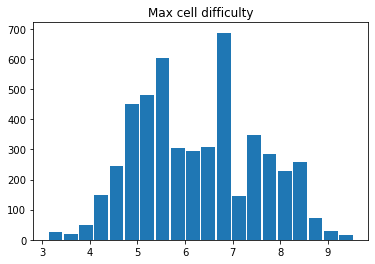

In [56]:
plt.hist(difficulty_info["max_cell_difficulty"], bins=20, rwidth=.9)
plt.title("Max cell difficulty")
plt.show()

In [57]:
for game in difficulty_info.nlargest(20, "max_cell_difficulty")["game"]:
    print(game.data)
    display(game.to_dataframe(solution=True))

{'max_cell_difficulty': 9.546507799097387, 'avg_cell_difficulty': 5.702168709698444, 'difficulty_level': 'hard'}


,Flag color: Blue,Capital ending letter: I,Africa
Capital starting letter: M,"GQ,KM,LR,LS,MH,NI,PH,RU,SO,SZ,UY",KM,"GQ,KM,LR,LS,MZ,SO,SZ"
Bottom 20 Population,"AD,AG,BB,KI,LC,LI,MH,NR,PW,SC,SM,TV,VC,WS",TV,SC
Flag color: Orange,"AM,IN,MH",IN,"CI,NE,ZM"


{'max_cell_difficulty': 9.546507799097387, 'avg_cell_difficulty': 5.099928774274921, 'difficulty_level': 'hard'}


,Bottom 20 Population,Europe,Africa
Flag color: Black,"AG,BB,DM,KN,LC,VU","AL,BE,DE,EE","AO,BW,EG,GH,GW,KE,LS,LY,MW,MZ,SD,SS,SZ,TZ,UG,Z..."
Capital ending letter: I,TV,"FI,(GE)","CF,DJ,KE,KM,LY,RW"
Landlocked,"AD,LI,SM","AD,AT,BY,CH,CZ,HU,LI,LU,MD,MK,RS,SK,SM,XK,(AM,AZ)","BF,BI,BW,CF,ET,LS,ML,MW,NE,RW,SS,SZ,TD,UG,ZM,ZW"


{'max_cell_difficulty': 9.546507799097387, 'avg_cell_difficulty': 6.806923201096818, 'difficulty_level': 'hard'}


,Bottom 20 Population,Ending letter: S,Flag color: Orange
Capital ending letter: I,TV,"AE,KM",IN
Landlocked,"AD,LI,SM","BY,LA","AM,BT,NE,ZM"
Bottom 20 Area,"AD,AG,BB,GD,KN,LC,LI,MC,MH,NR,PW,SC,SM,TO,TV,VC","BB,KN,MH,MV,SC,VC",MH


{'max_cell_difficulty': 9.546507799097387, 'avg_cell_difficulty': 6.47197795358585, 'difficulty_level': 'hard'}


,Bottom 20 Population,Island Nation,No mountains over 1000m
Starting letter: D,DM,"DM,DO",DK
Starting letter: P,PW,"PG,PH,PW","PW,PY"
Capital ending letter: I,TV,"KM,TV,TW",TV


{'max_cell_difficulty': 9.546507799097387, 'avg_cell_difficulty': 5.1308729950159, 'difficulty_level': 'hard'}


,Starting letter: K,Top 20 Area,Bottom 20 Population
Africa,KE,"CD,DZ,LY,SD,TD",SC
Capital ending letter: I,KE,"IN,LY",TV
Flag color: Green,"KE,KW","BR,DZ,IN,IR,LY,MX,SA,SD","DM,GD,KN,SC,VC,VU,(SM)"


{'max_cell_difficulty': 9.495446267489777, 'avg_cell_difficulty': 4.7421369726915525, 'difficulty_level': 'hard'}


,Capital ending letter: N,Mountain over 5000m,S. America
Top 20 Population,"DE,IR,US","CD,CN,IN,IR,MX,PK,RU,US",BR
Landlocked,"AM,CH,PY,(KZ)","AF,BO,BT,KG,KZ,NP,TJ,UG","BO,PY"
Ending letter: U,NR,PE,PE


{'max_cell_difficulty': 9.495446267489777, 'avg_cell_difficulty': 5.308665244432361, 'difficulty_level': 'hard'}


,Capital ending letter: N,Flag color: Green,Capital starting letter: L
No mountains over 1000m,"BB,DK,EE,NR,PY,TT","BF,BJ,BY,GD,GH,GM,GW,KW,LT,MR,MU,MV,SC,SN,TG,(...","LU,TG"
Starting letter: U,"GB,US","AE,UZ",GB
Ending letter: U,NR,"GW,VU",PE


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 6.106213588536202, 'difficulty_level': 'hard'}


,Mountain over 5000m,Landlocked,Bottom 20 Area
Capital starting letter: A,KZ,"AD,ET,KZ,PY,TM",AD
Starting letter: N,NP,"MK,NE,NP",NR
Capital ending letter: I,"GE,IN,KE","CF,RW",TV


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 5.254887642188944, 'difficulty_level': 'hard'}


,Landlocked,Top 20 Area,Bottom 20 Area
Capital ending letter: I,"CF,RW","IN,LY",TV
Ending letter: A,"AD,AM,AT,BO,BW,ET,MD,MK,MN,RS,RW,SK,UG,ZM,(CZ)","AR,AU,CA,CN,DZ,ID,IN,LY,MN,RU,SA,(US)","AD,AG,GD,LC,MT,TO"
Flag color: Black,"AF,BW,LS,MW,SS,SZ,UG,ZM,ZW","LY,SD","AG,BB,KN,LC"


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 4.628075845156144, 'difficulty_level': 'hard'}


,Capital ending letter: I,Europe,Africa
Mountain over 5000m,"GE,IN,KE","RU,(GE)","CD,KE,TZ,UG"
Top 20 Population,"IN,VN","DE,FR,RU","CD,EG,ET,NG"
Bottom 20 Area,TV,"AD,LI,MC,MT,SM",SC


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 4.732908342352768, 'difficulty_level': 'hard'}


,Bottom 20 Area,Top 20 Area,Top 20 Population
Starting letter: P,PW,PE,"PH,PK"
Capital ending letter: I,TV,"IN,LY","IN,VN"
Island Nation,"AG,BB,BH,GD,KN,LC,MH,MT,MV,NR,PW,SC,SG,TO,TV,VC","ID,(AU)","ID,JP,PH"


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 4.439225242987298, 'difficulty_level': 'hard'}


,Ending letter: S,Capital ending letter: I,Europe
Top 20 Area,US,"IN,LY",RU
Bottom 20 Area,"BB,KN,MH,MV,SC,VC",TV,"AD,LI,MC,MT,SM"
Top 20 Population,"PH,US","IN,VN","DE,FR,RU"


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 6.657008347443997, 'difficulty_level': 'hard'}


,Bottom 20 Area,No mountains over 1000m,Island Nation
Ending letter: E,SG,SG,SG
Flag color: Orange,MH,MH,"IE,LK,MH"
Capital ending letter: I,TV,TV,"KM,TV,TW"


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 6.281348410371837, 'difficulty_level': 'hard'}


,Island Nation,Bottom 20 Area,No mountains over 1000m
Capital ending letter: I,"KM,TV,TW",TV,TV
Africa,"KM,MG,MU,SC",SC,"BF,BJ,GH,GM,GW,MR,MU,SC,SN,TG"
Starting letter: P,"PG,PH,PW",PW,"PW,PY"


{'max_cell_difficulty': 9.492368705612321, 'avg_cell_difficulty': 4.8070818391317225, 'difficulty_level': 'hard'}


,Mountain over 5000m,Ending letter: M,Bottom 20 Area
Flag color: Red,"AF,BO,CA,CD,CL,CN,CO,EC,GE,IR,KE,KG,MM,MX,NP,P...","BE,GB,VN","AD,AG,BH,GD,KN,LI,MC,MT,MV,SC,SG,TO,TV"
Flag color: Black,"AF,KE,TZ,UG,(EC)",BE,"AG,BB,KN,LC"
Capital ending letter: I,"GE,IN,KE",VN,TV


{'max_cell_difficulty': 9.127916078101565, 'avg_cell_difficulty': 6.492193521410897, 'difficulty_level': 'hard'}


,Capital ending letter: I,Starting letter: A,Starting letter: M
Oceania,TV,AU,MH
Island Nation,"KM,TV,TW","AG,(AU)","MG,MH,MT,MU,MV"
No mountains over 1000m,TV,AG,"MC,MD,MH,MR,MT,MU,MV"


{'max_cell_difficulty': 9.127916078101565, 'avg_cell_difficulty': 4.579485059578746, 'difficulty_level': 'hard'}


,Capital ending letter: I,Top 20 Area,No mountains over 1000m
Oceania,TV,AU,"KI,MH,NR,PW,TV"
Starting letter: U,AE,US,UY
Asia,"AE,GE,IN,TW,VN","CN,ID,IN,IR,KZ,MN,SA,(RU)","BH,KW,MV,QA,SG"


{'max_cell_difficulty': 9.127916078101565, 'avg_cell_difficulty': 5.40604694146984, 'difficulty_level': 'hard'}


,Top 20 Area,Capital ending letter: I,Capital starting letter: Y
Flag color: Blue,"AR,AU,BR,CD,IN,KZ,MN,RU,TD,US","CF,DJ,FI,IN,KM,RW,TV,TW","AM,NR"
Oceania,AU,TV,NR
Island Nation,"ID,(AU)","KM,TV,TW",NR


{'max_cell_difficulty': 9.110170830605405, 'avg_cell_difficulty': 5.210293272134203, 'difficulty_level': 'hard'}


,Ending letter: U,Capital starting letter: B,Landlocked
Top 20 Area,PE,"AR,BR,CN","KZ,MN,TD"
Bottom 20 Area,"NR,PW,TV","BB,KN","AD,LI,SM"
S. America,PE,"AR,BR,CO","BO,PY"


{'max_cell_difficulty': 9.110170830605405, 'avg_cell_difficulty': 6.383446140474896, 'difficulty_level': 'hard'}


,Capital starting letter: P,Bottom 20 Area,No mountains over 1000m
Africa,"BJ,MU,ZA",SC,"BF,BJ,GH,GM,GW,MR,MU,SC,SN,TG"
Ending letter: U,VU,"NR,PW,TV","GW,NR,PW,TV"
Landlocked,"CZ,XK","AD,LI,SM","BF,BY,LU,MD,PY,SM"


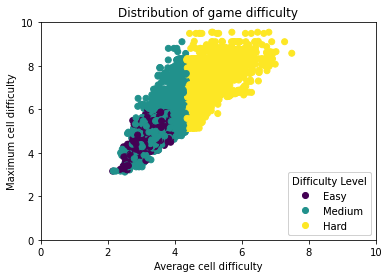

medium    2085
hard      2000
easy       915
Name: level, dtype: int64


In [58]:
scatter = plt.scatter(x=difficulty_info["avg_cell_difficulty"], y=difficulty_info["max_cell_difficulty"], c=difficulty_info["level"])
plt.xlabel("Average cell difficulty")
plt.ylabel("Maximum cell difficulty")
plt.title("Distribution of game difficulty")
plt.xlim([0,10])
plt.ylim([0,10])
ax = plt.gca()
legend = ax.legend(scatter.legend_elements()[0], ["Easy", "Medium", "Hard"], loc="lower right", title="Difficulty Level")
ax.add_artist(legend)
plt.show()

print(difficulty_info["level"].value_counts())

In [59]:
cell_info = estimator.cell_info
cell_info.nsmallest(20, "difficulty")

,row_cat,row_val,col_cat,col_val,contents,alt_contents,size,row_difficulty,col_difficulty,row_col_difficulty,solution_difficulty,difficulty
1819,flag_colors,White,flag_colors,Red,"[AE, AF, AG, AT, AU, AZ, BG, BH, BI, BN, BY, B...","[PT, UG, UZ, VE]",104,0.233578,0.000000,0.000000,0.000000,0.000000
1785,flag_colors,Red,flag_colors,Blue,"[AD, AG, AM, AU, AZ, BZ, CD, CF, CL, CO, CR, C...","[ME, PT, UZ]",64,0.000000,1.670898,0.748154,0.648648,0.722494
1786,flag_colors,White,flag_colors,Blue,"[AG, AR, AU, AZ, BA, BR, BW, BZ, CF, CL, CR, C...","[PT, VE]",73,0.233578,1.670898,0.869736,0.552758,0.735783
134,flag_colors,Red,continent,AS,"[AE, AF, AM, AZ, BD, BH, BN, CN, GE, ID, IQ, I...","[EG, RU, UZ]",39,0.000000,1.413996,0.614432,0.973575,0.821394
1823,top_20_population,True,flag_colors,Red,"[BD, CD, CN, DE, EG, ET, FR, ID, IR, JP, MX, P...",[],16,2.270772,0.000000,1.060401,0.811329,0.968150
1832,top_20_population,True,flag_colors,White,"[BR, EG, FR, ID, IN, IR, JP, MX, NG, PH, PK, R...",[],14,2.270772,0.233578,1.181983,0.771698,1.010539
204,flag_colors,Red,continent,EU,"[AD, AL, AT, BE, BG, BY, CH, CZ, DE, DK, ES, F...","[AM, AZ, GE]",36,0.000000,1.361697,0.587209,1.447773,1.052592
135,flag_colors,White,continent,AS,"[AE, AF, AZ, BH, BN, BT, GE, ID, IL, IN, IQ, I...","[EG, RU]",38,0.233578,1.413996,0.736014,1.319590,1.063258
1834,top_20_area,True,flag_colors,White,"[AR, AU, BR, CA, DZ, ID, IN, IR, LY, MX, PE, R...",[],15,2.512386,0.233578,1.307748,0.772258,1.075880
1825,top_20_area,True,flag_colors,Red,"[AU, CA, CD, CN, DZ, ID, IR, LY, MN, MX, PE, R...",[],15,2.512386,0.000000,1.186166,0.914244,1.086434


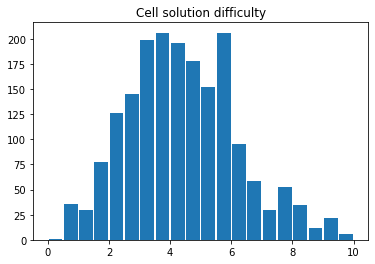

In [60]:
plt.hist(cell_info["solution_difficulty"], bins=20, rwidth=.9)
plt.title("Cell solution difficulty")
plt.show()

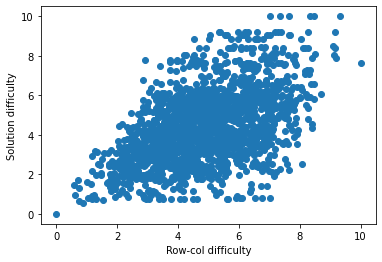

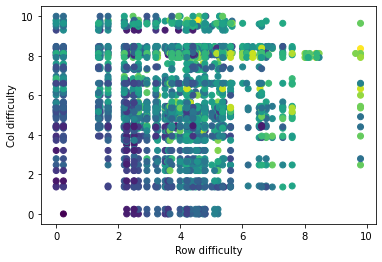

In [61]:
plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["solution_difficulty"])
plt.xlabel("Row-col difficulty")
plt.ylabel("Solution difficulty")
plt.show()

plt.scatter(x=cell_info["row_difficulty"], y=cell_info["col_difficulty"], c=cell_info["solution_difficulty"])
plt.xlabel("Row difficulty")
plt.ylabel("Col difficulty")
plt.show()
# plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["row_col_difficulty_harmonic"])
# plt.show()

In [62]:
# difficulty_info.nlargest(10, "difficulty")

In [63]:


# plt.scatter(x=np.log(df["gdp"]) - np.log(df["population"]), y=df["gdp_per_capita"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.show()